In [15]:
import pandas as pd
import numpy as np
import utilities
import torch
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "/home/groups/ConradLab/daniel/sharp_data/sharp_sims_de_testing/"

In [16]:
#mean_accuracies = []
accuracies = []
x_vals = []
labels = []
for i in [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    print(i)
    real_path = data_path + "splat_" + str(i) + "_de_rq_103122/"
    counts = pd.read_csv(real_path + "query_counts.csv", index_col=0)
    _,keep_cells,_,_ = utilities.preprocess(np.array(counts))
    _,marker_names = utilities.read_marker_file(real_path + "markers.txt")
    preds = pd.read_csv(real_path + "preds.csv", index_col=0)
    preds = utilities.factorize_df(preds, marker_names)
    real_labels = pd.read_csv(real_path + "query_meta.csv", index_col=0).Group
    real_labels = np.array(pd.factorize(real_labels, sort=True)[0])
    real_labels = real_labels[keep_cells]
    
    #accuracies = []
    #print(preds.columns)
    for col in preds.columns:
        accuracies.append(utilities.validation_metrics(torch.tensor(real_labels), torch.tensor(preds[col]), range(len(real_labels)), range(len(real_labels)))[0])
        #print(utilities.validation_metrics(torch.tensor(real_labels), torch.tensor(preds[col]), range(len(real_labels)), range(len(real_labels)))[0])
        #print(i)
        #print(col)
        x_vals.append(i)
        labels.append(col)
    #mean_accuracies.append(statistics.mean(accuracies))
    

0.3
0.4
0.5
0.6
0.7
0.8
0.9
1


In [ ]:
colors = ['scina', 'scsorter', 'sctype', 'singler', 'scpred'] * 

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['scina', 'scsorter', 'sctype', 'singler', 'scpred', 'scina', 'scsorter', 'sctype', 'singler', 'scpred', 'scina', 'scsorter', 'sctype', 'singler', 'scpred', 'scina', 'scsorter', 'sctype', 'singler', 'scpred', 'scina', 'scsorter', 'sctype', 'singler', 'scpred', 'scina', 'scsorter', 'sctype', 'singler', 'scpred', 'scina', 'scsorter', 'sctype', 'singler', 'scpred', 'scina', 'scsorter', 'sctype', 'singler', 'scpred']

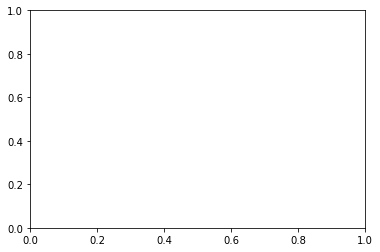

In [7]:
plt.scatter(x_vals, accuracies, c= labels)
plt.xlabel("de.facScale Value")
plt.ylabel("Average Tool Accuracy")
plt.title("de.facScale vs Average Tool Accuracy")
plt.savefig('figures/sims_param_plot.pdf')

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


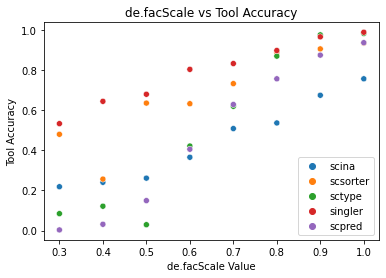

In [18]:
sns.scatterplot(x_vals, accuracies, hue= labels)
plt.xlabel("de.facScale Value")
plt.ylabel("Tool Accuracy")
plt.title("de.facScale vs Tool Accuracy")
plt.savefig('figures/sims_param_plot.pdf')